# Part I -  Airline On-Time Performance Data
## by Hiba Chafroud

## Introduction
> 
Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The 2009 ASA Statistical Computing and Graphics Data Expo consisted of flight arrival and departure details for all commercial flights on major carriers within the USA, from October 1987 to April 2008. This is a large dataset containing nearly 120 million records in total and takes 1.5G .So for memory problem we are going to choose working with the latest date available which is 2008.




The aim of this project is to provide a graphical summary of important features of the data set. 



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime


%matplotlib inline

## Preliminary Wrangling

### Assessing Data

The data that we will be working with consts of 4 csv files;
* 'airport.csv' contains data about airports.
* 'flights-2008.csv' contains data about flighs in the year 2008 ,such as departure and arriavale time, flight number , cancelation and others .
* 'carriers.csv' contains data about airlines.
* 'plane-data.csv' contains data about planes such as tail number, model rngine type and others.

In [2]:
airports = pd.read_csv('airports.csv')
flights_2008 = pd.read_csv('2008.csv')
carriers = pd.read_csv('carriers.csv')
plane_data = pd.read_csv('plane-data.csv')



In [3]:
print('airports dataset containes ',airports.shape[0],' rows and',airports.shape[1],'columns.')
print('flights_2008 dataset containes ',flights_2008.shape[0],' rows and',flights_2008.shape[1],'columns.')

print('carriers dataset containes ',carriers.shape[0],' rows and',carriers.shape[1],'columns.')

print('plane_data dataset containes ',plane_data.shape[0],' rows and',plane_data.shape[1],'columns.')


airports dataset containes  3376  rows and 7 columns.
flights_2008 dataset containes  2389217  rows and 29 columns.
carriers dataset containes  1491  rows and 2 columns.
plane_data dataset containes  5029  rows and 9 columns.


Let's take a look at the datastypes in these datasets and the missing data.
#### airports dataset

In [4]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


In [5]:
airports.isnull().sum() 

iata        0
airport     0
city       12
state      12
country     0
lat         0
long        0
dtype: int64

Notice that is 12 missing values in the columns city and state.

In [6]:
airports.country.unique() #unique values in country

array(['USA', 'Thailand', 'Palau', 'N Mariana Islands',
       'Federated States of Micronesia'], dtype=object)

In [7]:
airports.state.unique()#unique values in state


array(['MS', 'TX', 'CO', 'NY', 'FL', 'AL', 'WI', 'OH', 'MO', 'MN', 'IN',
       'NV', 'IL', 'ND', 'MI', 'NE', 'GA', 'DC', 'TN', 'AK', 'ME', 'MA',
       'VT', 'SD', 'NM', 'OK', 'KS', 'KY', 'IA', 'AR', 'LA', 'CA', 'WA',
       'VA', 'AZ', 'PA', 'NJ', 'OR', 'NC', 'UT', 'MT', 'ID', 'CT', 'SC',
       'NH', 'MD', 'DE', 'WV', 'WY', 'PR', 'RI', nan, 'AS', 'CQ', 'GU',
       'HI', 'VI'], dtype=object)

In [8]:
airports.describe()


,lat,long
count,3376.000000,3376.000000
mean,40.036524,-98.621205
std,8.329559,22.869458
min,7.367222,-176.646031
25%,34.688427,-108.761121
50%,39.434449,-93.599425
75%,43.372612,-84.137519
max,71.285448,145.621384


#### flights_2008 dataset

In [9]:
flights_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 528.6+ MB


In [10]:
flights_2008.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

Notice that there are alot of missing values , but remember that the data size is 2,389,217 so of them won't make a difference when we drop them especially if we're not interested to visualise those columns. CancellationCode,CarrierDelay ,WeatherDelay,NASDelay,SecurityDelay and LateAircraftDelay seem to have the highest missing value.

In [11]:
flights_2008[flights_2008.CancellationCode.isnull()].head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


As we can notice the absence of values in the column CancellationCode led to some absence of other values in the columns CarrierDelay,WeatherDelay,NASDelay,SecurityDelay and LateAircraftDelay.

Let's look at the canceled flights that doesn't have a CancellationCode ie flights that have a missing value in the column DepTime since a flight that doesn't have a arrival of departure time is naturally cancelled.


In [12]:
flights_2008[flights_2008.DepTime.isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
42,2008,1,3,4,NaN,800,NaN,850,WN,609,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
259,2008,1,3,4,NaN,700,NaN,830,WN,126,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
454,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
480,2008,1,3,4,NaN,905,NaN,1025,WN,469,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
482,2008,1,3,4,NaN,1620,NaN,1740,WN,618,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
496,2008,1,3,4,NaN,1930,NaN,2035,WN,2528,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
757,2008,1,3,4,NaN,845,NaN,1140,WN,437,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
767,2008,1,3,4,NaN,1925,NaN,2045,WN,934,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
808,2008,1,3,4,NaN,600,NaN,805,WN,3326,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
962,2008,1,3,4,NaN,1110,NaN,1215,WN,1402,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


The  same conclusion as above , the absence of a DepTime let to missing that in the columns CRSDepTime,ArrTime and CRSArrTime.

In [13]:
flights_NotCancelled = flights_2008.query('Cancelled == 0') #we are looking now dor flights that aren't canceled to see if they have missing data


In [14]:
flights_NotCancelled.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                 5654
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    3
ActualElapsedTime       5654
CRSElapsedTime           288
AirTime                 5654
ArrDelay                5654
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                  5654
TaxiOut                    0
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1740192
WeatherDelay         1740192
NASDelay             1740192
SecurityDelay        1740192
LateAircraftDelay    1740192
dtype: int64

CancellationCode,CarrierDelay ,WeatherDelay,NASDelay,SecurityDelay and LateAircraftDelay seem to have the highest missing value.

In [15]:
flights_2008.duplicated().sum() #we only have 4 duplicated rows


4

In [16]:
flights_2008[flights_2008.duplicated()]


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
937927,2008,2,28,4,829.0,835,1341.0,1350,F9,728,...,6.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
937929,2008,2,28,4,1427.0,1435,1640.0,1636,F9,727,...,9.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
937931,2008,2,28,4,1854.0,1807,1946.0,1902,F9,773,...,8.0,13.0,0,NaN,0,44.0,0.0,0.0,0.0,0.0
937933,2008,2,28,4,2027.0,1942,2314.0,2229,F9,780,...,10.0,13.0,0,NaN,0,1.0,0.0,44.0,0.0,0.0


In [17]:
#flights_2008.drop_duplicates()

In [18]:
flights_2008[['Cancelled','Diverted']].head(5) #these two should be boolean since the represent yes and no answers

,Cancelled,Diverted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#### carriers dataset

In [19]:
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
Code           1490 non-null object
Description    1491 non-null object
dtypes: object(2)
memory usage: 23.4+ KB


In [20]:
carriers.isnull().sum() #1 missing value

Code           1
Description    0
dtype: int64

In [21]:
carriers.duplicated().sum() #no dulicated dataset


0

In [22]:
len(carriers.Code.unique()) #all airlines have a unique code

1491

#### plane_data dataset

In [23]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
tailnum          5029 non-null object
type             4480 non-null object
manufacturer     4480 non-null object
issue_date       4480 non-null object
model            4480 non-null object
status           4480 non-null object
aircraft_type    4480 non-null object
engine_type      4480 non-null object
year             4480 non-null object
dtypes: object(9)
memory usage: 353.7+ KB


In [24]:
plane_data.isnull().sum() #few missing data

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year             549
dtype: int64

In [25]:
plane_data.duplicated().sum() #no duplicated data


0

### Data Problems 

Some datatypes in these datasets needs to change : 
##### Tidiness issues

* Converte state and country in airports into category dtype .
* Change Cancelled and Diverted to Boolean dtype in flights_2008.
* DepTime, CRSDepTime, ArrTime, and CRSArrTime in flights_2008 need to be changed as datetime dtypes and not numerical data types.
* Change Month, DayofMonth and DayOfWeek with the right values in flights_2008 and change datatypes into category.
* Convert UniqueCarrier, Origin, and Dest into category.

#### Quality issues

* Drop  unnecessary columns.
* Drop duplicates.
* Drop Nan.


In [26]:
airports_copy = airports.copy()
flights_2008_copy = flights_2008.copy()
carriers_copy = carriers.copy() 
plane_data_copy = plane_data.copy() 

### Cleaning Data

###### Define 
* Drop Nan values .
* Drop duplicates.
* Drop  unnecessary columns.

###### Code

In [27]:
flights_2008_copy.drop_duplicates(inplace=True)


In [28]:
#drop those which have Nan in DepTime ,CRSDepTime, ArrTime or CRSArrTime
flights_2008_copy[flights_2008_copy['DepTime'].isna()].head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
42,2008,1,3,4,NaN,800,NaN,850,WN,609,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
259,2008,1,3,4,NaN,700,NaN,830,WN,126,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
454,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
480,2008,1,3,4,NaN,905,NaN,1025,WN,469,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
482,2008,1,3,4,NaN,1620,NaN,1740,WN,618,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN


In [29]:
flights_2008_copy.dropna(subset=['DepTime'], inplace=True)


In [30]:
flights_2008_copy[flights_2008_copy['CRSDepTime'].isna()].head(5)#as we noticed above if a value is missing in one of these columns it's most likey to be missed in another

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [31]:
flights_2008_copy[flights_2008_copy['ArrTime'].isna()].head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1844,2008,1,3,4,922.0,915,NaN,1050,WN,1069,...,NaN,12.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
1992,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2732,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2807,2008,1,4,5,737.0,705,NaN,825,WN,178,...,NaN,13.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
3464,2008,1,4,5,931.0,930,NaN,1145,WN,2011,...,NaN,10.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN


In [32]:
flights_2008_copy.dropna(subset=['ArrTime'], inplace=True)


In [33]:
flights_2008_copy[flights_2008_copy['CRSArrTime'].isna()].head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [34]:
plane_data_copy[plane_data_copy['type'].isna()].head() #since we noticed that these is missing values here

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
plane_data_copy.dropna(subset=['type'], inplace=True) 


In [36]:
carriers_copy[carriers_copy['Code'].isna()]

,Code,Description
873,NaN,North American Airlines


In [37]:
carriers_copy.dropna(subset=['Code'], inplace=True) 


In [38]:
airports_copy[airports_copy['city'].isna()]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
1715,HHH,Hilton Head,NaN,NaN,USA,32.224384,-80.697629
2251,MIB,Minot AFB,NaN,NaN,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,NaN,NaN,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,NaN,NaN,USA,47.961167,-97.401167
2794,ROP,Prachinburi,NaN,NaN,Thailand,14.078333,101.378334
2795,ROR,Babelthoup/Koror,NaN,NaN,Palau,7.367222,134.544167
2900,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,NaN,NaN,USA,47.615058,-117.655803


In [39]:
airports_copy.dropna(subset=['city'], inplace=True) 


In [40]:
airports_copy[airports_copy['state'].isna()]#also the missing values in the column city led to a missing values in the colum state

,iata,airport,city,state,country,lat,long


In [41]:
#dropping TaxiIn and TaxiOut since the won't matter in our analysis
flights_2008_copy.drop(['TaxiIn','TaxiOut'], axis=1, inplace=True)

In [42]:
airports_copy[airports_copy['city'].isna()]

,iata,airport,city,state,country,lat,long


We won't drop Nan values in CarrierDelay,WeatherDelay,NASDelay,SecurityDelay, LateAircraftDelay and CancellationCode since the value is big  and we will be loosing important data some we will drom those columns .

In [43]:
flights_2008_copy.drop(['CarrierDelay','WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay','CancellationCode'], axis=1, inplace=True)

###### Test

In [44]:
flights_2008_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319117 entries, 0 to 2389216
Data columns (total 21 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
Cancelled            int64
Diverted             int64
dtypes: float64(7), int64(10), object(4)
memory usage: 389.3+ MB


In [45]:
flights_2008_copy[flights_2008_copy['DepTime'].isna()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted


In [46]:
flights_2008_copy[flights_2008_copy['CRSArrTime'].isna()].head(5)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted


In [47]:
plane_data_copy[plane_data_copy['type'].isna()]

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year


In [48]:
carriers_copy[carriers_copy['Code'].isna()]

,Code,Description


In [49]:
airports_copy[airports_copy['city'].isna()]

,iata,airport,city,state,country,lat,long


In [50]:
flights_2008_copy.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled', 'Diverted'],
      dtype='object')

###### Define

* Converte state and country in airports into category dtype .
* Change Cancelled and Diverted to Boolean dtype in flights_2008.
* DepTime, CRSDepTime, ArrTime, and CRSArrTime in flights_2008 need to be changed as datetime dtypes and not numerical data types.
* Convert UniqueCarrier, Origin, and Dest into category.


###### Code

In [51]:
print(airports_copy.state.unique()) #be aware for the nan value
print(airports_copy.country.unique())

['MS' 'TX' 'CO' 'NY' 'FL' 'AL' 'WI' 'OH' 'MO' 'MN' 'IN' 'NV' 'IL' 'ND' 'MI'
 'NE' 'GA' 'DC' 'TN' 'AK' 'ME' 'MA' 'VT' 'SD' 'NM' 'OK' 'KS' 'KY' 'IA' 'AR'
 'LA' 'CA' 'WA' 'VA' 'AZ' 'PA' 'NJ' 'OR' 'NC' 'UT' 'MT' 'ID' 'CT' 'SC' 'NH'
 'MD' 'DE' 'WV' 'WY' 'PR' 'RI' 'AS' 'CQ' 'GU' 'HI' 'VI']
['USA']


In [52]:
state = ['MS', 'TX', 'CO', 'NY', 'FL', 'AL', 'WI', 'OH', 'MO', 'MN', 'IN',
       'NV', 'IL', 'ND', 'MI', 'NE', 'GA', 'DC', 'TN', 'AK', 'ME', 'MA',
       'VT', 'SD', 'NM', 'OK', 'KS', 'KY', 'IA', 'AR', 'LA', 'CA', 'WA',
       'VA', 'AZ', 'PA', 'NJ', 'OR', 'NC', 'UT', 'MT', 'ID', 'CT', 'SC',
       'NH', 'MD', 'DE', 'WV', 'WY', 'PR', 'RI', 'AS', 'CQ', 'GU',
       'HI', 'VI']
country = list(airports_copy.country.unique())

In [53]:
# creating the CategoricalDtype
stateClass = pd.api.types.CategoricalDtype(categories=state)
countryClass = pd.api.types.CategoricalDtype(categories=country, ordered=True)


In [54]:
# applying convertion to variables in dataframe
airports_copy['state'] = airports_copy['state'].astype(stateClass)
airports_copy['country'] = airports_copy['country'].astype(countryClass)


In [55]:
flights_2008_copy[['DepTime','CRSDepTime','ArrTime','CRSArrTime']].describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
count,2.319117e+06,2.319117e+06,2.319117e+06,2.319117e+06
mean,1.340109e+03,1.329276e+03,1.485835e+03,1.495850e+03
std,4.802425e+02,4.660631e+02,5.081295e+02,4.848134e+02
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,9.300000e+02,9.250000e+02,1.110000e+03,1.115000e+03
50%,1.331000e+03,1.322000e+03,1.516000e+03,1.519000e+03
75%,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03
max,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03


A quick look at the summary statistics on these features above made it clear that these values, though cast as either integers or floats, were actually meant to represent time-points, as indicated by their own names and accompanying descriptions, and by the fact that they’re scaled from 1 to 2400.

A '10' in any of these columns, for example, would represent 00:10:00 (or ten minutes after midnight). Likewise, a '744' would represent 07:44:00 and a '1931' would stand for 19:31:00.

In [56]:
print(datetime.strptime(str(int(float(flights_2008_copy['DepTime'].iloc[0]))).strip(" ").zfill(4), "%H%M").time())

13:43:00


In [57]:
def hm(x):
    if (x == 2400.0):#the problem of 2400.0 is that it won't convert it to 00:00:00
        return(datetime.strptime('0'.strip().zfill(4), "%H%M").time())
    else :
        return(datetime.strptime(str(int(float(x))).strip().zfill(4), "%H%M").time())


In [58]:
print(hm(2400.0))

00:00:00


In [59]:
flights_2008_copy['DepTime'] = flights_2008_copy['DepTime'].apply(lambda x: hm(x))
flights_2008_copy['CRSDepTime'] = flights_2008_copy['CRSDepTime'].apply(lambda x: hm(x))


In [60]:
flights_2008_copy['ArrTime'] = flights_2008_copy['ArrTime'].apply(lambda x: hm(x))
flights_2008_copy['CRSArrTime'] = flights_2008_copy['CRSArrTime'].apply(lambda x: hm(x))

In [61]:
print(flights_2008_copy.DayOfWeek.unique())
print(flights_2008_copy.Month.unique()) #the reson of 4 because we only have data until the month of April
print(flights_2008_copy.DayofMonth.unique())

[4 5 6 7 1 2 3]
[1 2 3 4]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31  2  1]


In [62]:
# creating values to be mapped
map_month = {1 : "January", 2 : "February", 3:"March" , 4:"April ", 5:"May" , 6:"Jun" , 7:"July" ,
           8:"August" , 9:"September" , 10:"October" , 11:"November" , 12:"December"}

# mapping each value to it's respective column
flights_2008_copy.Month = flights_2008_copy.Month.map(map_month)


In [63]:
map_day = {1 : "Monday", 2 : "Tuesday", 3:"Wednesday" , 4:"Thursday", 5:"Friday" , 6:"Saturday" , 7:"Sunday" }

flights_2008_copy.DayOfWeek = flights_2008_copy.DayOfWeek.map(map_day)


In [64]:
print(flights_2008_copy.DayOfWeek.unique())
print(flights_2008_copy.Month.unique()) 

['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['January' 'February' 'March' 'April ']


In [65]:
DayOfWeek = ["Monday", "Tuesday", "Wednesday" , "Thursday", "Friday" , "Saturday" , "Sunday" ]
Month = ["January", "February", "March" , "April ", "May" , "Jun" , "July" ,
           "August" , "September" , "October" , "November" , "December"]
DayofMonth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

In [66]:
# creating the CategoricalDtype
DayOfWeekClass = pd.api.types.CategoricalDtype(categories=DayOfWeek, ordered=True)
MonthClass = pd.api.types.CategoricalDtype(categories=Month, ordered=True)
DayofMonthClass = pd.api.types.CategoricalDtype(categories=DayofMonth, ordered=True)

In [67]:
# applying convertion to variables in dataframe
flights_2008_copy['DayOfWeek'] = flights_2008_copy['DayOfWeek'].astype(DayOfWeekClass)
flights_2008_copy['Month'] = flights_2008_copy['Month'].astype(MonthClass)
flights_2008_copy['DayofMonth'] = flights_2008_copy['DayofMonth'].astype(DayofMonthClass)

In [68]:
print(flights_2008_copy.Cancelled.value_counts())
print(flights_2008_copy.Diverted.value_counts())

0    2319117
Name: Cancelled, dtype: int64
0    2319117
Name: Diverted, dtype: int64


In [69]:
flights_2008_copy.Cancelled = flights_2008_copy.Cancelled.apply(lambda x: bool(x))
flights_2008_copy.Diverted = flights_2008_copy.Cancelled.apply(lambda x: bool(x))

In [70]:
flights_2008_copy[['UniqueCarrier','Origin' , 'Dest']].dtypes

UniqueCarrier    object
Origin           object
Dest             object
dtype: object

In [71]:
flights_2008_copy['UniqueCarrier'] = flights_2008_copy['UniqueCarrier'].astype('category')
flights_2008_copy['Origin'] = flights_2008_copy['Origin'].astype('category')
flights_2008_copy['Dest'] = flights_2008_copy['Dest'].astype('category')


###### Test

In [72]:
airports_copy[['state','country']].dtypes

state      category
country    category
dtype: object

In [73]:
flights_2008_copy[['DepTime','CRSDepTime','ArrTime','CRSArrTime']].head(3)

,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,13:43:00,13:25:00,14:51:00,14:35:00
1,11:25:00,11:20:00,12:47:00,12:45:00
2,20:09:00,20:15:00,21:36:00,21:40:00


In [74]:
flights_2008_copy[['DepTime','CRSDepTime','ArrTime','CRSArrTime']].dtypes

DepTime       object
CRSDepTime    object
ArrTime       object
CRSArrTime    object
dtype: object

In [75]:
flights_2008_copy[['DayOfWeek' ,'Month', 'DayofMonth']].head(1)

,DayOfWeek,Month,DayofMonth
0,Thursday,January,3


In [76]:
print(flights_2008_copy.Cancelled.value_counts())
print(flights_2008_copy.Diverted.value_counts())

False    2319117
Name: Cancelled, dtype: int64
False    2319117
Name: Diverted, dtype: int64


In [77]:
flights_2008_copy[['UniqueCarrier','Origin' , 'Dest']].dtypes

UniqueCarrier    category
Origin           category
Dest             category
dtype: object

###### Save data 

In [78]:
def save_to_csv(filename,dataframe):
    dataframe.to_csv(filename+'.csv', index = False, header=True, sep=';',encoding='utf-8')

In [79]:
save_to_csv('airports_copy1',airports_copy)
save_to_csv('flights_2008_copy1',flights_2008_copy)
save_to_csv('carriers_copy1',carriers_copy)
save_to_csv('plane_data_copy1',plane_data_copy)


## Univariate Exploration
#### Days of week
Let's first see how variables are distributed.


We will be starting the exploration by looking at the main variable of interest: Days.We will be looking at the number of flights per day .


In [80]:
day_counts = flights_2008_copy['DayOfWeek'].value_counts()
day_counts

Wednesday    354455
Tuesday      346043
Thursday     340309
Friday       338154
Monday       337658
Sunday       321369
Saturday     281129
Name: DayOfWeek, dtype: int64

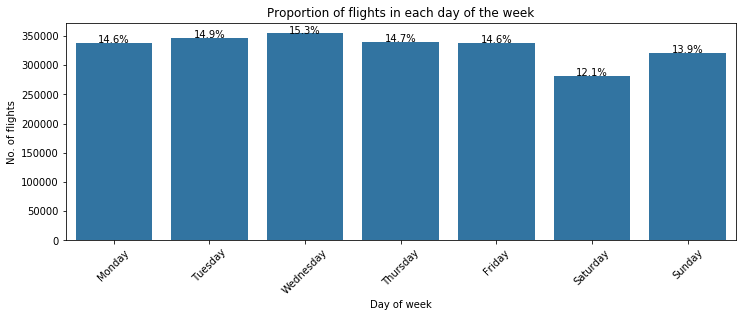

In [81]:
plt.rcParams["figure.figsize"] = (12,4)

sb.countplot(data=flights_2008_copy, x='DayOfWeek', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('Day of week')
plt.title('Proportion of flights in each day of the week')

day_sum = day_counts.sum()

locs, labels = plt.xticks(rotation=45)
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/day_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.show()

The plot above represents the number flights per day of the week for the year 2008.
We can notice that during weekdays, the number of flights is alomost the same everyday but there is a reduction of flights on weekend(Sunday and Saturday) and the lowest number of flights is on Saturday .

Another observation could be that Wednesday has the most flights.Since Wednesday is a weekday perhapssome airlines make special sales for that day and some people like to travel on weekdend trips and get back on sunday which explain the increase of number of flight on Sunday.

#### Months
Number of flights in each month.

In [83]:
month_counts = flights_2008_copy['Month'].value_counts()
month_counts

March        598343
January      587130
April        586723
February     546921
December          0
November          0
October           0
September         0
August            0
July              0
Jun               0
May               0
Name: Month, dtype: int64

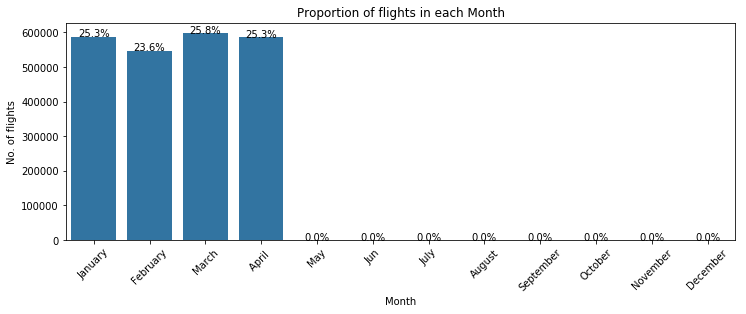

In [84]:
plt.rcParams["figure.figsize"] = (12,4)

sb.countplot(data=flights_2008_copy, x='Month', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('Month')
plt.title('Proportion of flights in each Month')

month_sum = month_counts.sum()

locs, labels = plt.xticks(rotation=45)
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = month_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/month_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.show()

The plot above represents the number flights per month for the year 2008. The zero values for other months is explained because of the absence of our data because it stopped the collection until April 2008.

We can notice that the number of flights is almost in January , March and April .There is a small derease in the month of February maybe because January is a new year and people tend to travel and celebrate.

#### Days of month
Number of flights in each day of the month.

In [85]:
dm_count = flights_2008_copy['DayofMonth'].value_counts()
dm_count

14    80617
28    80203
24    80083
25    79752
7     79459
21    79323
11    78896
18    78868
3     78826
20    78537
17    78076
10    77810
27    77669
4     77589
13    77147
15    76676
29    75785
6     75778
2     75732
23    75512
16    75442
22    74352
1     74111
8     74080
9     73413
5     72840
19    72256
26    72013
12    71039
30    58574
31    38659
Name: DayofMonth, dtype: int64

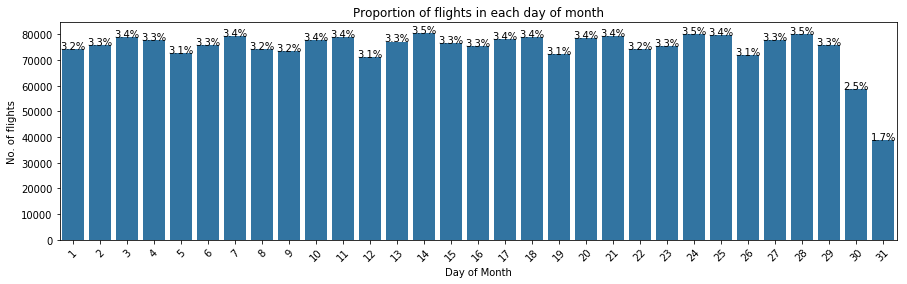

In [87]:
plt.rcParams["figure.figsize"] = (15,4)

sb.countplot(data=flights_2008_copy, x='DayofMonth', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('Day of Month')
plt.title('Proportion of flights in each day of month')

dm_sum = dm_count.sum()

locs, labels = plt.xticks(rotation=45)
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = dm_count[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/dm_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


plt.show()

The plot above represents the number flights per days of month for the year 2008. 

We can notice that the number of flights is almost the same on everyday of the month except for the end of the month we can notice a remarkable decrease on the 29th ,30th and 31th day of the month.We can explain this that people did afford traveling at the end of the month .

#### Hours of day
Number of flights in each hour of the day.

In [88]:
#flights_2008_copy.DepTime[0].hour
flights_2008_copy['DepTimeHour'] = flights_2008_copy.DepTime.apply(lambda x :x.hour) #we creat w new column to seperate the departure hour from the time

In [89]:
hour_count = flights_2008_copy['DepTimeHour'].value_counts()
hour_count

6     150143
11    149316
8     148612
16    147389
17    147188
7     147177
13    146497
10    143767
9     143539
14    140502
12    140216
15    139016
18    136247
19    133671
20     98170
21     88943
5      48443
22     41955
23     17155
0       7215
1       2038
4       1096
2        590
3        232
Name: DepTimeHour, dtype: int64

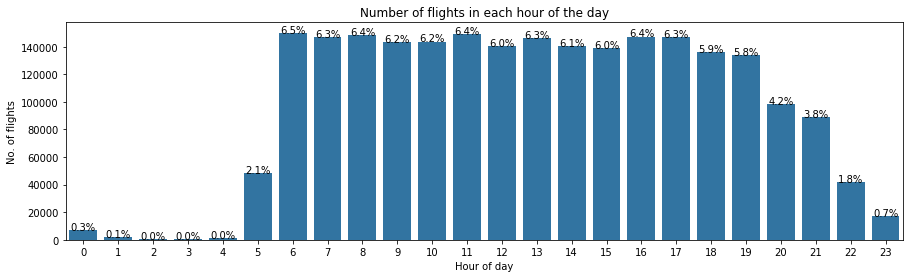

In [90]:
plt.rcParams["figure.figsize"] = (15,4)

sb.countplot(data=flights_2008_copy, x='DepTimeHour', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('Hour of day')
plt.title('Number of flights in each hour of the day')

hour_sum = hour_count.sum()

locs, labels = plt.xticks()
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = hour_count[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/hour_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


plt.show()

The plot above represents the number flights per hour of day for the year 2008. 

We can notice that flights begin genereal at 6Am at continue at the same rate(6%) until 17P.At that time the number of flight drops to nearnly (0%) from midnight until the next peak at 5AM.

#### state
Where are interested to see where people travel the most and for that we need to see the crowdest airport in each city.

In [91]:
state_count = airports_copy.state.value_counts()
state_count

AK    263
TX    209
CA    205
OK    102
FL    100
OH    100
GA     97
NY     97
MI     94
MN     89
IL     88
WI     84
KS     78
IA     78
MO     74
AR     74
AL     73
NE     73
MS     72
NC     72
PA     71
MT     71
TN     70
WA     65
IN     65
AZ     59
OR     57
SD     57
LA     55
ND     52
SC     52
NM     51
KY     50
CO     49
VA     47
ID     37
NJ     35
UT     35
ME     34
NV     32
WY     32
MA     30
WV     24
MD     18
HI     16
CT     15
NH     14
VT     13
PR     11
RI      6
DE      5
VI      5
CQ      4
AS      3
DC      1
GU      1
Name: state, dtype: int64

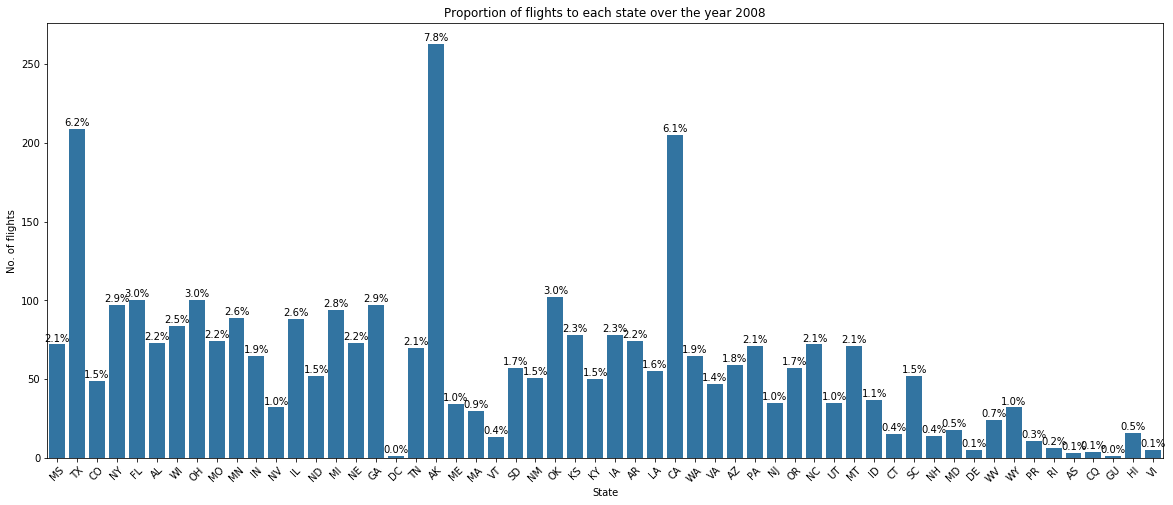

In [92]:
plt.rcParams["figure.figsize"] = (20,8)

sb.countplot(data=airports_copy, x='state', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('State')
plt.title('Proportion of flights to each state over the year 2008')

state_sum = state_count.sum()

locs, labels = plt.xticks(rotation=45)
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = state_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/state_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.show()

The plot above represents the number flights to each state over the year 2008. 

An interesting pattern in this variable , 3 peaks around the values'TX' ,'AK' and 'CA'. 
we can say that people perper to travel to Texas, Alaska and California.

We can also notice that in this case there is a multimodal distribution of the data.

#### Delays 
Is it true that flights can take off early ? well we are going to see if that really happens.

In [93]:
flights_2008_copy.DepDelay.describe()

count    2.319117e+06
mean     1.138915e+01
std      3.642260e+01
min     -9.200000e+01
25%     -4.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      2.467000e+03
Name: DepDelay, dtype: float64

We can see that there are negative values which means that there are really flights which take off early.Let's see how they are distributed.

(array([  2.29442500e+06,   2.37260000e+04,   6.81000000e+02,
          1.79000000e+02,   8.20000000e+01,   1.90000000e+01,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  -92. ,   163.9,   419.8,   675.7,   931.6,  1187.5,  1443.4,
         1699.3,  1955.2,  2211.1,  2467. ]),
 <a list of 10 Patch objects>)

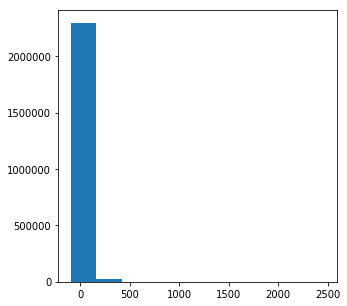

In [94]:
plt.rcParams["figure.figsize"] = (5,5)

plt.hist(flights_2008_copy.DepDelay)


From the histogram, we can see that the flight departure delay is highly skewed to the right and most of the values are in the value 0 .Let's apply set limits in x-axis.

In [95]:
flights_2008_copy.DepDelay.value_counts().head(20)


 0.0     181081
-5.0     170348
-3.0     156798
-2.0     155376
-4.0     151829
-1.0     145614
-6.0      97990
 1.0      77761
-7.0      76157
 2.0      58172
-8.0      56759
-10.0     51090
 3.0      48196
-9.0      41889
 4.0      40960
 5.0      38739
 6.0      32528
 7.0      30462
 8.0      27798
 10.0     27532
Name: DepDelay, dtype: int64

In [96]:
flights_2008_copy.DepDelay.min() #min delay is -92, meaing that there are which take of before 90 minutes form its actual time 

-92.0

In [97]:
flights_2008_copy.DepDelay.mean() #the avreage delay is about 11 minutes

11.389145955119988

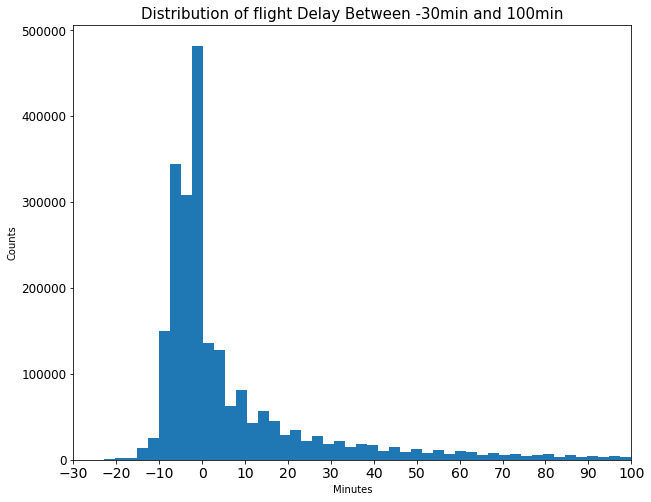

In [98]:
plt.rcParams["figure.figsize"] = (10,8)
ticks = [-30, -10,-3 , 0, 10, 3, 30,100 ]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=flights_2008_copy, x='DepDelay', bins=1000)
plt.xlim(-30,100)
plt.xticks(np.arange(-30,101,10))
plt.title('Distribution of flight Delay Between -30min and 100min',fontsize=15)
plt.ylabel('Counts')
plt.xlabel('Minutes')
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.show()

The plot above shows an interesting pattern in flight delays, where there is a large peak around a single decimal value(0), then a gradual tailing off to the right until the next peak. This can ensure us that there isn't much delayed flights ,but yet  an important amount of flights take off before 10 min of its actual time .

#### Early ,On-Time or Delayed 
We are intresed to see the distribution of flights that are either earlt , on-time or delayed . 

In [99]:
len(flights_2008_copy[flights_2008_copy['Cancelled'] == True] ) #we can notice that there are no canceled flights in this dataset

0

In [100]:
flights_2008_copy.DepDelay.mean() #the avreage delay is about 11 minutes

11.389145955119988

In [101]:
def delay_set(x):
    if (x < 0):
        return('Early')
    elif(x > 0):
            return('Delay')
    else:
        return ('On-Time')

In [102]:
df_1 = flights_2008_copy.loc[:, ["DepDelay"]]

In [103]:
df_1.DepDelay = df_1.DepDelay.apply(lambda x: delay_set(x))

In [104]:
df_1.DepDelay.value_counts()


Early      1147771
Delay       990265
On-Time     181081
Name: DepDelay, dtype: int64

In [105]:
timing_counts = df_1.DepDelay.value_counts()
timing_counts

Early      1147771
Delay       990265
On-Time     181081
Name: DepDelay, dtype: int64

In [106]:
timing_order = ['Early', 'On-Time', 'Delay']

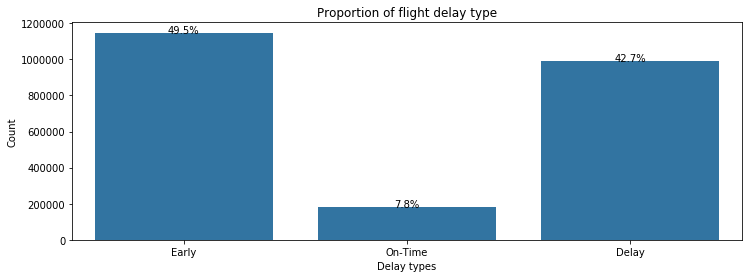

In [107]:
plt.rcParams["figure.figsize"] = (12,4)

sb.countplot(data=df_1, x='DepDelay', color = sb.color_palette()[0],order=timing_order);


plt.ylabel('Count')
plt.xlabel('Delay types')
plt.title('Proportion of flight delay type')

timing_sum = timing_counts.sum()

locs, labels = plt.xticks()
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = timing_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/timing_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.show()

The plot above shows the proportion of flight delay type.We can notice the the highest values in to the flights with early time than it actual flight time which conferms the perious plot that we concluded that most time delays are (-10).

## Bivariate Exploration

#### Average of flight delays per month and per week day 
At this phase we are inteseted to see what is the average flight delays per month and average flight delays per week day. 

In [108]:
df_daymonth_delayed =  pd.DataFrame({'count' : flights_2008_copy[flights_2008_copy.DepDelay > 0].groupby('DayofMonth').size()}).reset_index()


In [109]:
df_daymonth= pd.DataFrame({'count' : flights_2008_copy.groupby('DayofMonth').size()}).reset_index()

In [110]:
df_daymonth.head()

,DayofMonth,count
0,1,74111
1,2,75732
2,3,78826
3,4,77589
4,5,72840


In [111]:
df_daymonth_delayed['percentage']=df_daymonth_delayed['count']*100/df_daymonth['count']

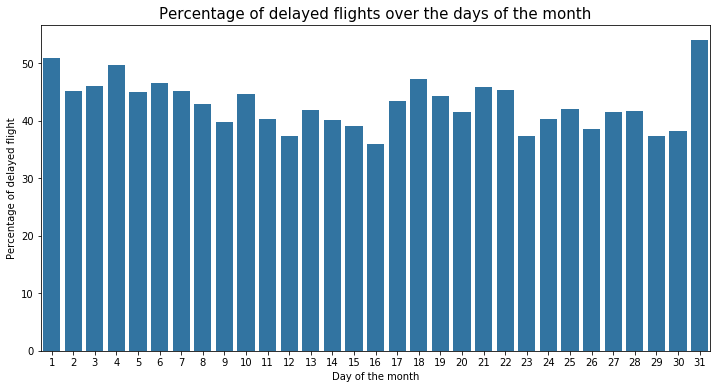

In [112]:
# plot the number of delayed flights per day of the month
f, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x="DayofMonth",
            y="percentage",
            data=df_daymonth_delayed,
            color = sb.color_palette()[0],
            ax=ax)
plt.xticks(size = 10)
plt.yticks(size = 10)

# set plot's labels
ax.set(xlabel='Day of the month', ylabel='Percentage of delayed flight')
ax.set_title("Percentage of delayed flights over the days of the month", size=15)

plt.show()

From this plot which represents flight delays per month days we can say that most of the flights get delayed by 50 percent.
This amount drops after the 1st day of the month and increase on the last day.As we noticed in perivious plot that the number of flights decrease at the end of the month ,these two can be related since also at the end of the month mosh flights get delayed.

In [113]:
df_dayweek_delayed =  pd.DataFrame({'count' : flights_2008_copy[flights_2008_copy.DepDelay > 0].groupby('DayOfWeek').size()}).reset_index()


In [114]:
df_dayweek= pd.DataFrame({'count' : flights_2008_copy.groupby('DayOfWeek').size()}).reset_index()

In [115]:
df_dayweek.head()

,DayOfWeek,count
0,Monday,337658
1,Tuesday,346043
2,Wednesday,354455
3,Thursday,340309
4,Friday,338154


In [116]:
df_dayweek_delayed['percentage']=df_dayweek_delayed['count']*100/df_dayweek['count']

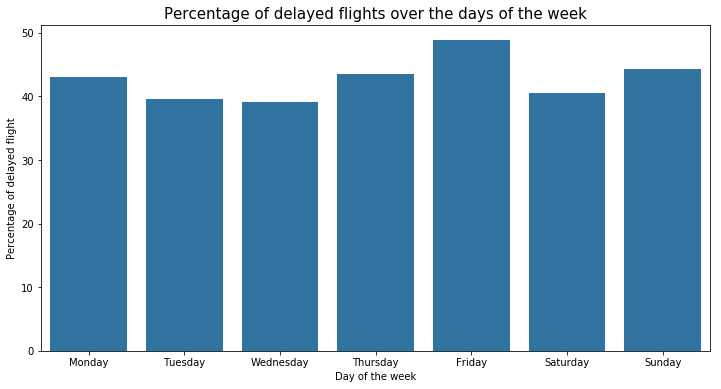

In [118]:
# plot the number of delayed flights per day of the week
f, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x="DayOfWeek",
            y="percentage",
            data=df_dayweek_delayed,
            color = sb.color_palette()[0],
            ax=ax)
plt.xticks(size = 10)
plt.yticks(size = 10)

# set plot's labels
ax.set(xlabel='Day of the week', ylabel='Percentage of delayed flight')
ax.set_title("Percentage of delayed flights over the days of the week", size=15)

plt.show()

As expected from the previous plot when inspecting the number of flights in each day of the week, the percentage of delayed flights is higher in the middle of the week (Friday), while it decreases on weekend(Saturday and Dunday).Botice that Wednesday which has the highest number of flights,has the lowest delayed flights. 

#### What is the percentage of delayed flights for different hours of the day? 


In [141]:
df_hour_delayed =  pd.DataFrame({'count' : flights_2008_copy[flights_2008_copy.DepDelay > 0].groupby('DepTimeHour').size()}).reset_index()


In [142]:
df_hour= pd.DataFrame({'count' : flights_2008_copy.groupby('DepTimeHour').size()}).reset_index()

In [144]:
df_hour.head()

,DepTimeHour,count
0,0,7215
1,1,2038
2,2,590
3,3,232
4,4,1096


In [145]:
df_hour_delayed['percentage']=df_hour_delayed['count']*100/df_hour['count']

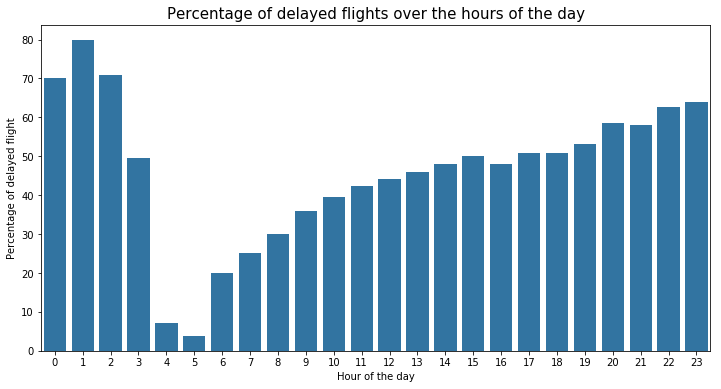

In [146]:
# plot the number of delayed flights per hour of the day
f, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x="DepTimeHour",
            y="percentage",
            data=df_hour_delayed,
            color = sb.color_palette()[0],
            ax=ax)
plt.xticks(size = 10)
plt.yticks(size = 10)

# set plot's labels
ax.set(xlabel='Hour of the day', ylabel='Percentage of delayed flight')
ax.set_title("Percentage of delayed flights over the hours of the day", size=15)

plt.show()

This plot confirm the previous plot ,low number of flights at night. In particular we have hight number in the period after midnight and a remarkable drop between 4 and 5 AM then continue to increase until the peak in 1AM.

#### Which are the **top 20** busiest airports? 


In [148]:
print(flights_2008_copy.Origin.unique())
print(flights_2008_copy.Dest.unique())

[HOU, HRL, IAD, IND, ISP, ..., GCC, RKS, MKG, DLG, AKN]
Length: 291
Categories (291, object): [HOU, HRL, IAD, IND, ..., RKS, MKG, DLG, AKN]
[LIT, MAF, MCO, MDW, MSY, ..., GCC, RKS, MKG, AKN, DLG]
Length: 291
Categories (291, object): [LIT, MAF, MCO, MDW, ..., RKS, MKG, AKN, DLG]


In [149]:
# number of outbound flights per airport
df_out_airport = pd.DataFrame({'count' : flights_2008_copy.groupby(flights_2008_copy.Origin).size()}).reset_index()
df_out_airport= df_out_airport.rename(columns={"Origin": "airport"})


In [150]:
# number of inbound flights per airport
df_in_airport = pd.DataFrame({'count' : flights_2008_copy.groupby(flights_2008_copy.Dest).size()}).reset_index()
df_in_airport= df_out_airport.rename(columns={"Dest": "airport"})


In [151]:
# number of flights per airport
df_airport=pd.DataFrame( pd.concat([df_out_airport,df_in_airport],ignore_index=True).groupby('airport').sum()).reset_index()


In [152]:
print("Top 20 busiest airports (outbound)")
print(df_out_airport.sort_values('count',ascending=False).head(20))


print("Top 20 busiest airports (inbound)")
print(df_in_airport.sort_values('count',ascending=False).head(20))

print("Top 20 busiest airports")
print(df_airport.sort_values('count',ascending=False).head(20))

Top 20 busiest airports (outbound)
    airport   count
17      ATL  133852
202     ORD  109196
79      DFW   88575
78      DEN   77023
151     LAX   72096
211     PHX   68434
132     IAH   61601
149     LAS   58802
85      DTW   54616
256     SLC   47699
94      EWR   46901
169     MCO   44968
191     MSP   44642
248     SFO   44299
61      CLT   40831
144     JFK   38708
35      BOS   38576
156     LGA   38269
46      BWI   34086
247     SEA   33492
Top 20 busiest airports (inbound)
    airport   count
17      ATL  133852
202     ORD  109196
79      DFW   88575
78      DEN   77023
151     LAX   72096
211     PHX   68434
132     IAH   61601
149     LAS   58802
85      DTW   54616
256     SLC   47699
94      EWR   46901
169     MCO   44968
191     MSP   44642
248     SFO   44299
61      CLT   40831
144     JFK   38708
35      BOS   38576
156     LGA   38269
46      BWI   34086
247     SEA   33492
Top 20 busiest airports
    airport   count
17      ATL  267704
202     ORD  218392
79     

Atlanta Airport is on the hight visited airport with 267,704 total flights ,next to it Chicago O'Hare International Airport with 218,392 and Dallas/Fort Worth International Airport with 177,150 total flights.

#### Number of flights per Airline
At this phase we are intreseted to see which airline have a hisght flights number.
But first we need to merge flights_2008_copy and carriers_copy inorder to get the number of flights related to each airline company.

In [259]:
flights_2008_copy = pd.merge(left=flights_2008_copy, right=carriers_copy, how='left', left_on='UniqueCarrier', right_on='Code')

In [260]:
flights_2008_copy.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,DepTimeHour,Code,Description
0,2008,January,3,Thursday,13:43:00,13:25:00,14:51:00,14:35:00,WN,588,...,16.0,18.0,HOU,LIT,393,False,False,13,WN,Southwest Airlines Co.
1,2008,January,3,Thursday,11:25:00,11:20:00,12:47:00,12:45:00,WN,1343,...,2.0,5.0,HOU,MAF,441,False,False,11,WN,Southwest Airlines Co.
2,2008,January,3,Thursday,20:09:00,20:15:00,21:36:00,21:40:00,WN,3841,...,-4.0,-6.0,HOU,MAF,441,False,False,20,WN,Southwest Airlines Co.
3,2008,January,3,Thursday,09:03:00,08:55:00,12:03:00,12:05:00,WN,3,...,-2.0,8.0,HOU,MCO,848,False,False,9,WN,Southwest Airlines Co.
4,2008,January,3,Thursday,14:23:00,14:00:00,17:26:00,17:10:00,WN,25,...,16.0,23.0,HOU,MCO,848,False,False,14,WN,Southwest Airlines Co.


In [263]:
flights_2008_copy.Description.unique()


array(['Southwest Airlines Co.', 'Expressjet Airlines Inc.',
       'Mesa Airlines Inc.', 'Comair Inc.', 'Skywest Airlines Inc.',
       'United Air Lines Inc.',
       'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)',
       'Delta Air Lines Inc.', 'Atlantic Southeast Airlines',
       'Frontier Airlines Inc.', 'AirTran Airways Corporation',
       'Hawaiian Airlines Inc.', 'American Eagle Airlines Inc.',
       'Northwest Airlines Inc.', 'Pinnacle Airlines Inc.',
       'American Airlines Inc.', 'Aloha Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways',
       'Continental Air Lines Inc.'], dtype=object)

In [272]:
# changine description of US Airways inc to a shortform that didn't make the plot quit nice
name = flights_2008_copy.query("Description == 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'")
idx = name.index

In [274]:
flights_2008_copy.shape


(2319117, 24)

In [275]:
flights_2008_copy.iloc[idx,23] = 'US Airways Inc.'


In [289]:
# number of flights per airline
df_airline = pd.DataFrame({'count' : flights_2008_copy.groupby(flights_2008_copy.Description).size()}).reset_index()
# sorting by decreasing count
df_airline.sort_values('count', ascending=False, inplace=True)

In [294]:
df_airline= df_airline.rename(columns={"Description": "Airline company"})


In [299]:
df_airline.head()

,Airline company,count
17,Southwest Airlines Co.,393732
3,American Airlines Inc.,193114
16,Skywest Airlines Inc.,187917
4,American Eagle Airlines Inc.,158426
18,US Airways Inc.,150891


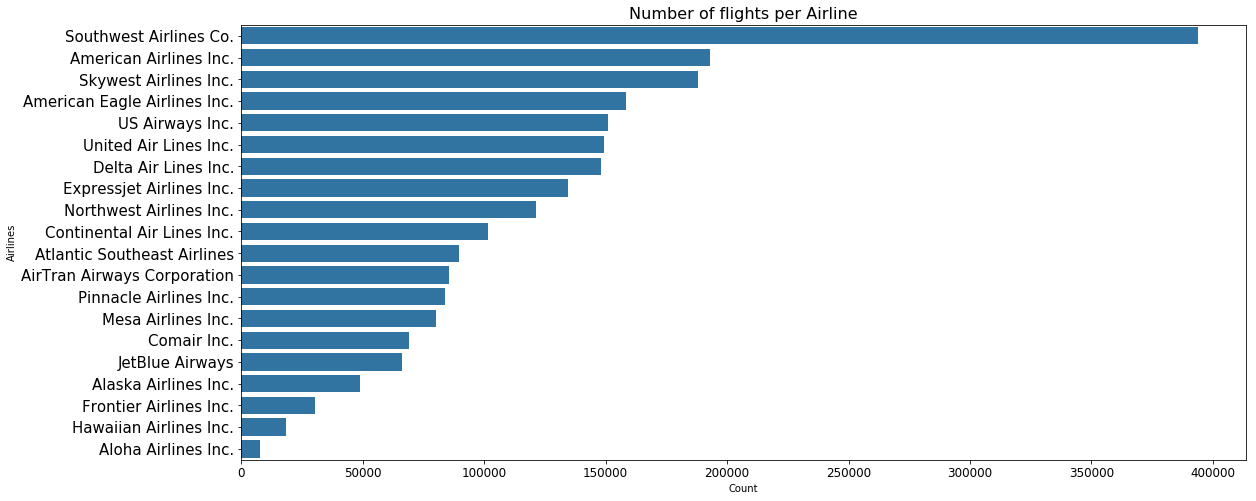

In [296]:
# plot the number of  flights per airline
f, ax = plt.subplots(figsize=(18, 8))
sb.barplot(x ="count",
            y="Airline company",
            data=df_airline,
            color = sb.color_palette()[0],
            ax=ax)


plt.xticks(size = 12)
plt.yticks(size = 15)


# set plot's labels
ax.set(xlabel='Count', ylabel='Airlines')
ax.set_title("Number of flights per Airline", size=16)


plt.show()

The plot above shows that Southwest Airlines Co. seems to be the most popular airline in the first four month of 2008 with a total of 393,732 registered flights followed by American Airlines Inc. with 193,114. and Skywest Airlines Inc with 187,917. The least used airline is Aloha Airlines Inc. having just 7752 total number of flights.



## Multivariate Exploration 
#### Number of flights per day of the week for each month

In [128]:
df1=pd.DataFrame({'count' : flights_2008_copy.groupby( ['Month', 'DayOfWeek'] ).size()}).reset_index()


In [129]:
df1 = df1.pivot("Month", "DayOfWeek", "count")


In [157]:
df1.describe()

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,4.000000,4.0000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,84414.500000,86510.7500,88613.750000,85077.250000,84538.500000,70282.250000,80342.250000
std,10833.276682,11783.0269,12002.865279,9108.601297,9069.316053,9055.026647,10522.035968
min,77815.000000,75639.0000,76532.000000,80207.000000,79742.000000,64998.000000,73546.000000
25%,77953.000000,76889.2500,79275.500000,80556.500000,79958.750000,65031.750000,74098.750000
50%,79682.000000,85699.5000,88734.500000,80683.000000,80136.500000,66182.000000,75963.000000
75%,86143.500000,95321.0000,98072.750000,85203.750000,84716.250000,71432.500000,82206.500000
max,100479.000000,99005.0000,100454.000000,98736.000000,98139.000000,83767.000000,95897.000000


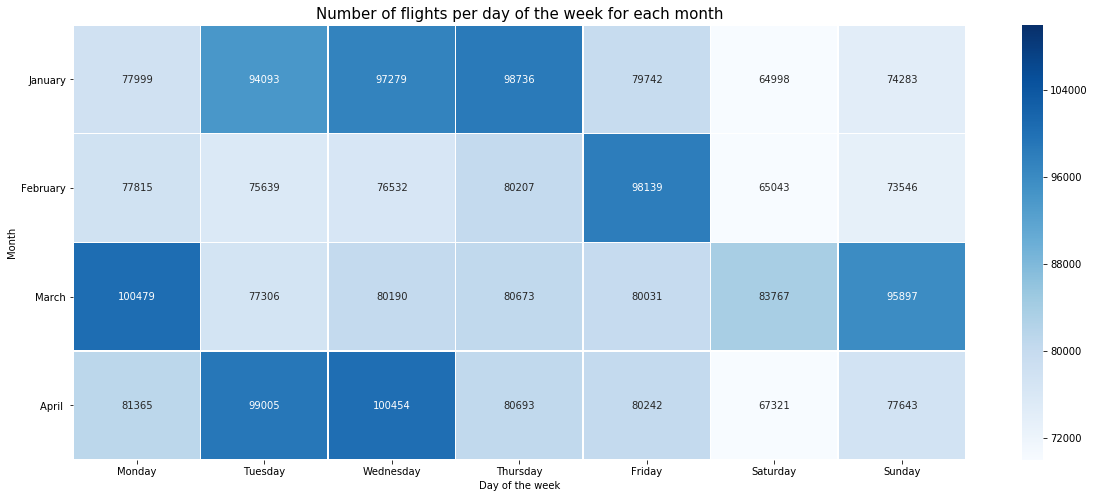

In [131]:
fig, ax=plt.subplots(figsize=(20,8))
ax = sb.heatmap(df1, 
                  linewidths=.5,
                  annot=True,
                  vmin=70000,
                  vmax=110000,
                  fmt='d',
                  cmap='Blues', ax=ax)
# set plot's labels
ax.set_xticklabels(DayOfWeek)
ax.set_yticklabels((Month), rotation=0)
ax.set(xlabel='Day of the week', ylabel='Month')
ax.set_title("Number of flights per day of the week for each month", size=15)

plt.show()

The heat map can offer a better data visualization to look for relevant information coming from the data. The map better shows the difference between week days and weekends, the highest number of flights are always during the week while the minimums are in the weekends.

#### Number of flights per day of the month for each day in month

In [132]:
df2=pd.DataFrame({'count' : flights_2008_copy.groupby(['Month','DayofMonth']).size()}).reset_index()

In [133]:
df2 = df2.pivot("Month", "DayofMonth", "count")

In [134]:
df2.describe()

DayofMonth,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000
mean,18527.75000,18933.000000,19706.500000,19397.250000,18210.000000,18944.500000,19864.750000,18520.000000,18353.250000,19452.500000,...,18588.000000,18878.000000,20020.750000,19938.000000,18003.250000,19417.250000,20050.750000,18946.250000,19524.666667,19329.500000
std,1270.86306,2120.255802,1117.526584,834.434489,1347.487291,978.593038,357.361978,1931.810205,1636.756829,785.039065,...,1169.808816,1553.208936,627.339023,124.249748,2045.980511,879.750485,451.736926,1385.542102,686.971858,330.218867
min,16771.00000,15885.000000,18075.000000,18281.000000,16939.000000,17514.000000,19553.000000,15670.000000,15918.000000,18438.000000,...,17121.000000,16673.000000,19182.000000,19761.000000,15814.000000,18178.000000,19445.000000,17168.000000,19041.000000,19096.000000
25%,18140.50000,18292.500000,19434.750000,19000.250000,17386.000000,18755.250000,19661.750000,18245.500000,18165.750000,19045.500000,...,18195.750000,18575.750000,19719.750000,19916.250000,16501.750000,19099.000000,19910.750000,18188.750000,19131.500000,19212.750000
50%,18781.00000,19709.500000,20151.000000,19607.000000,17928.500000,19280.000000,19767.000000,19235.000000,19035.500000,19589.000000,...,18625.000000,19259.500000,20188.500000,19969.500000,18093.000000,19701.500000,20112.000000,19246.500000,19222.000000,19329.500000
75%,19168.25000,20350.000000,20422.750000,20004.000000,18752.500000,19469.250000,19970.000000,19509.500000,19223.000000,19996.000000,...,19017.250000,19561.750000,20489.500000,19991.250000,19594.500000,20019.750000,20252.000000,20004.000000,19766.500000,19446.250000
max,19778.00000,20428.000000,20449.000000,20094.000000,20044.000000,19704.000000,20372.000000,19940.000000,19424.000000,20194.000000,...,19981.000000,20320.000000,20524.000000,20052.000000,20013.000000,20088.000000,20534.000000,20124.000000,20311.000000,19563.000000


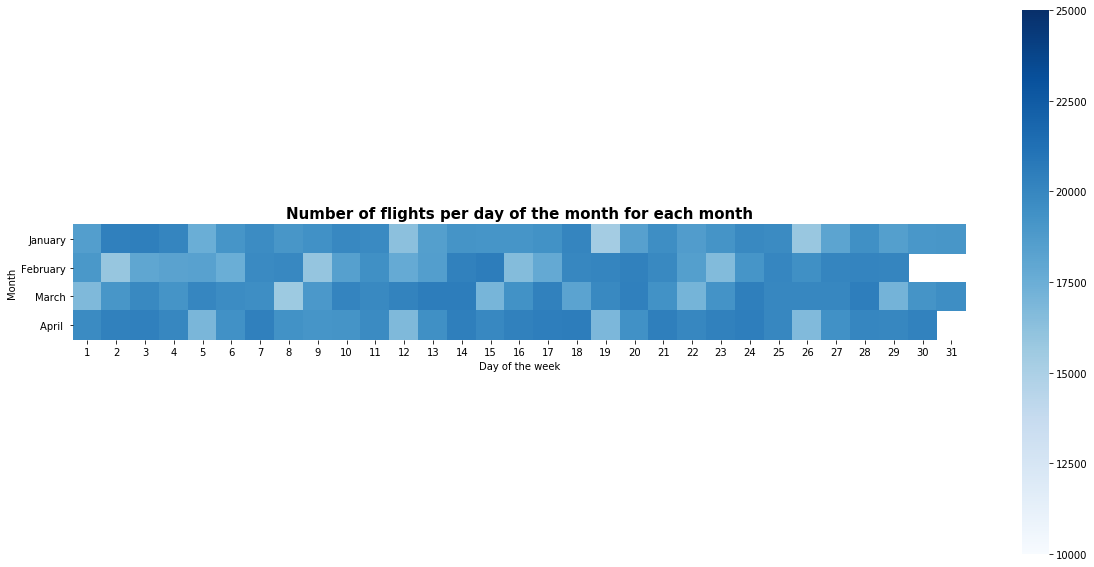

In [135]:
fig, ax=plt.subplots(figsize=(20,10))
sb.heatmap(df2,
            square=True,
            vmin=10000,
            vmax=25000,
            cmap='Blues')
# set plot's labels
ax.set_xticklabels(DayofMonth)
ax.set_yticklabels((Month), rotation=0)
ax.set(xlabel='Day of the week', ylabel='Month')
ax.set_title("Number of flights per day of the month for each month", fontweight="bold", size=15)

plt.show()

The heat map shows the number of flights per day of the month for each month.


#### Number of flights per hour for each month
At these phase we are intersted to see the number of flights per hour for each month

In [136]:
flights_2008_copy.DepTime[0].hour
#flights_2008_copy['DepTimeHour'] = flights_2008_copy.DepTime.apply(lambda x :x.hour) #we creat w new column to seperate the departure hour from the time

13

In [137]:
df3 = pd.DataFrame({'count' : flights_2008_copy.groupby(['Month','DepTimeHour']).size()}).reset_index()
df3 = df3.pivot("Month", "DepTimeHour", "count")


In [138]:
df3.describe()

DepTimeHour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,4.00000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1803.75000,509.500000,147.500000,58.00000,274.000000,12110.750000,37535.750000,36794.250000,37153.000000,35884.750000,...,35125.500000,34754.00000,36847.250000,36797.000000,34061.750000,33417.750000,24542.500000,22235.750000,10488.750000,4288.750000
std,187.31502,46.708315,10.376255,2.94392,30.254476,1058.321745,1991.346508,1646.525104,1738.700473,1413.471465,...,1303.718911,1438.32472,1336.397739,1475.638619,1495.005323,1444.461232,1194.367476,1067.241733,823.075685,381.991601
min,1620.00000,441.000000,138.000000,55.00000,230.000000,10920.000000,34671.000000,34680.000000,34649.000000,33789.000000,...,33354.000000,32605.00000,34911.000000,34827.000000,31851.000000,31472.000000,23020.000000,21361.000000,9679.000000,3828.000000
25%,1720.50000,500.250000,139.500000,55.75000,269.000000,11400.000000,36946.500000,36000.750000,36649.250000,35692.500000,...,34647.000000,34645.75000,36512.250000,36177.000000,33846.000000,33015.500000,23989.750000,21688.000000,10118.500000,4083.750000
50%,1765.00000,526.500000,146.000000,58.00000,283.500000,12147.000000,38235.000000,36986.000000,37756.000000,36449.500000,...,35361.500000,35387.50000,37294.500000,37043.000000,34637.000000,33620.000000,24649.500000,21898.000000,10320.500000,4301.000000
75%,1848.25000,535.750000,154.000000,60.25000,288.500000,12857.750000,38824.250000,37779.500000,38259.750000,36641.750000,...,35840.000000,35495.75000,37629.500000,37663.000000,34852.750000,34022.250000,25202.250000,22445.750000,10690.750000,4506.000000
max,2065.00000,544.000000,160.000000,61.00000,299.000000,13229.000000,39002.000000,38525.000000,38451.000000,36851.000000,...,36425.000000,35636.00000,37889.000000,38275.000000,35122.000000,34959.000000,25851.000000,23786.000000,11635.000000,4725.000000


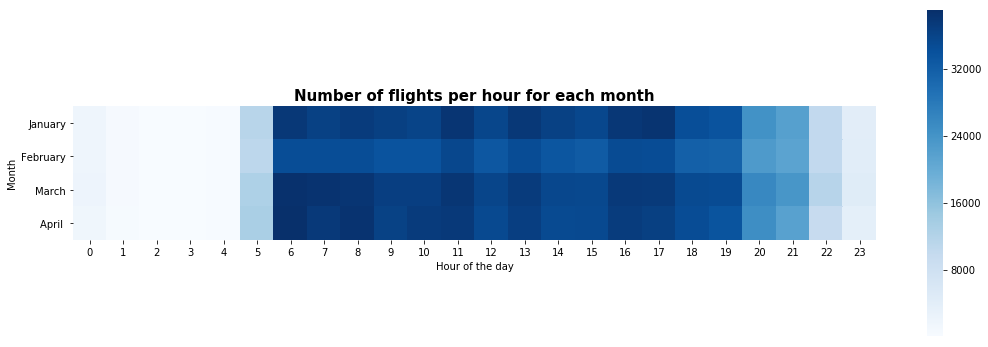

In [139]:
f, ax = plt.subplots(figsize=(18, 6))
sb.heatmap(df3,
            square=True,
            cmap='Blues')

# set plot's labels
ax.set_yticklabels(Month, rotation=0)
ax.set(xlabel='Hour of the day', ylabel='Month')
ax.set_title("Number of flights per hour for each month", fontweight="bold", size=15)

plt.show()

The heat map shows the number of flights per hour for each month.
 
We can notice that, regardless of the month, the number of flights drops down at night and it reaches is maximim values between 5 and 8 AM, with other small peak between 15 and 18.

#### Number of flights in a week-day per month


In [176]:
num_flight_day_month = flights_2008_copy.groupby(['Month', 'DayOfWeek']).count().Year
num_flight_day_month

Month      DayOfWeek
January    Monday        77999.0
           Tuesday       94093.0
           Wednesday     97279.0
           Thursday      98736.0
           Friday        79742.0
           Saturday      64998.0
           Sunday        74283.0
February   Monday        77815.0
           Tuesday       75639.0
           Wednesday     76532.0
           Thursday      80207.0
           Friday        98139.0
           Saturday      65043.0
           Sunday        73546.0
March      Monday       100479.0
           Tuesday       77306.0
           Wednesday     80190.0
           Thursday      80673.0
           Friday        80031.0
           Saturday      83767.0
           Sunday        95897.0
April      Monday        81365.0
           Tuesday       99005.0
           Wednesday    100454.0
           Thursday      80693.0
           Friday        80242.0
           Saturday      67321.0
           Sunday        77643.0
May        Monday            NaN
           Tuesday    

In [184]:
frequencies=[]
frequency=[]
for i in range(1,len(num_flight_day_month)+1):#7 days and 12months
    
    frequency.append(num_flight_day_month[i-1])

    if (i%7==0): #7days in a week
        frequencies.append(frequency) #frequancy of each day
        frequency=[]


In [180]:
# data to plot
num_months = 12


In [247]:
#choose of color 
colors = ['#4EC62C', '#DD382B', '#EB700E', '#4100C8', '#DBDA94' ,'#76A9CA' , '#DD7C03']


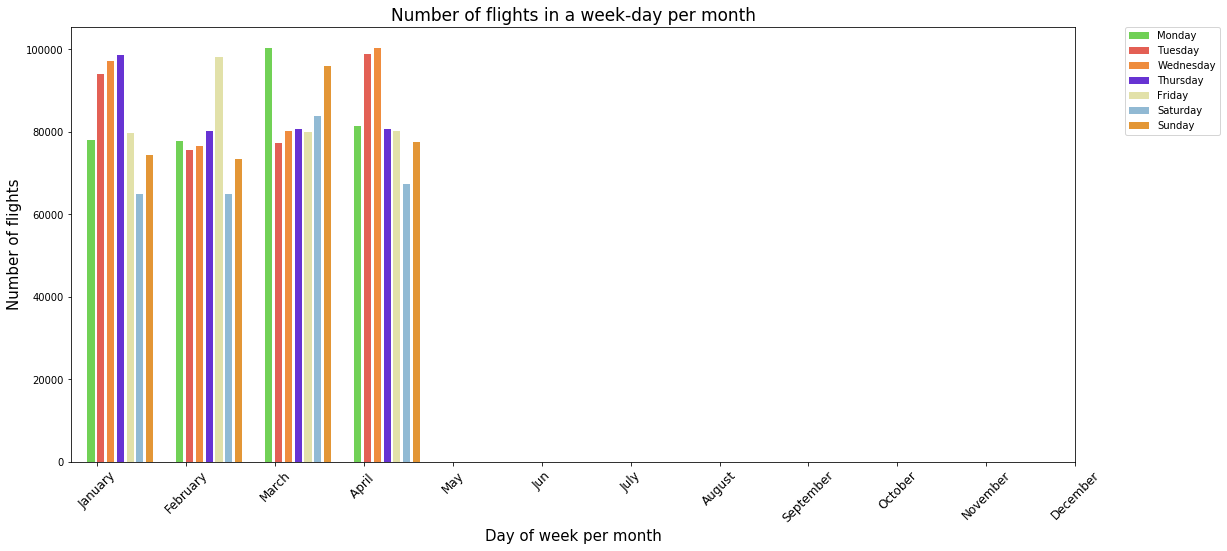

In [249]:
# create plot
plt.figure(figsize=(18,8))
index = np.arange(0, num_months * 5, 5)
bar_width = 0.55
opacity = 0.8

for i in range(7):
    plt.bar(index+bar_width*i,tuple([row[i] for row in frequencies]),align='edge',width=0.4,
    alpha=opacity,
    color=colors[i],
    label=DayOfWeek[i])

plt.xlabel('Day of week per month',size = 15)
plt.ylabel('Number of flights' , size = 15)
plt.title('Number of flights in a week-day per month', fontsize=17)

plt.xticks(index + bar_width, Month,rotation=45,size = 12)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

This plot above shows that over the year, the number of flights during the week days is generally stable while it decreases on Saturdays and Sundays.


#### Distribution of Delays for Airlines

In [314]:
flights_2008_copy['DelyType'] = flights_2008_copy.DepDelay.apply(lambda x :delay_set(x))

In [315]:
flights_2008_copy.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,DepTimeHour,Code,Description,DelyType
0,2008,January,3,Thursday,13:43:00,13:25:00,14:51:00,14:35:00,WN,588,...,18.0,HOU,LIT,393,False,False,13,WN,Southwest Airlines Co.,Delay
1,2008,January,3,Thursday,11:25:00,11:20:00,12:47:00,12:45:00,WN,1343,...,5.0,HOU,MAF,441,False,False,11,WN,Southwest Airlines Co.,Delay
2,2008,January,3,Thursday,20:09:00,20:15:00,21:36:00,21:40:00,WN,3841,...,-6.0,HOU,MAF,441,False,False,20,WN,Southwest Airlines Co.,Early
3,2008,January,3,Thursday,09:03:00,08:55:00,12:03:00,12:05:00,WN,3,...,8.0,HOU,MCO,848,False,False,9,WN,Southwest Airlines Co.,Delay
4,2008,January,3,Thursday,14:23:00,14:00:00,17:26:00,17:10:00,WN,25,...,23.0,HOU,MCO,848,False,False,14,WN,Southwest Airlines Co.,Delay


In [329]:
# creat a new dataframe by grouping airline company names and selecting DelyType 

df_airline_delayed = flights_2008_copy.groupby('Description')['DelyType'].value_counts(normalize=True).unstack()

In [330]:
df_airline_delayed.head()

DelyType,Delay,Early,On-Time
Description,,,
AirTran Airways Corporation,0.387047,0.567462,0.045492
Alaska Airlines Inc.,0.374026,0.581723,0.044251
Aloha Airlines Inc.,0.177632,0.734133,0.088235
American Airlines Inc.,0.474435,0.466709,0.058856
American Eagle Airlines Inc.,0.431741,0.511841,0.056418


In [333]:
# ordering columns
col_order = ['Early', 'On-Time', 'Delay']
df_airline_delayed = df_airline_delayed[col_order]

In [334]:
# sort by 'OEarly
df_airline_delayed.sort_values(by='Early', ascending=True, inplace=True)

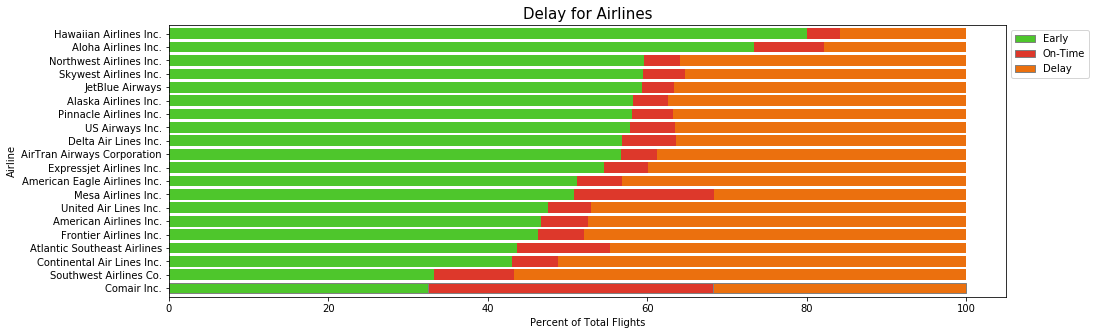

In [337]:
# plot stacked barchart
fig, ax = plt.subplots(figsize=[15,5])
(df_airline_delayed*100).plot(kind='barh', stacked=True, width=0.8,
                                color=colors, ax=ax, edgecolor='grey')
ax.set_title('Delay for Airlines', fontsize=15)
ax.set_xlabel('Percent of Total Flights')
ax.set_ylabel('Airline')
ax.legend(bbox_to_anchor=(1,1))


plt.show();

## Conclusions

After Analysing the 4 months of 2008 presented in the dataset which contained information about flights ,airports and carrierswe can conclude that :


* On weekends , flight registarion is at its lowest compared to weekdays.

* There isn't much to say about months since we don't have full year records.

* On the 29th ,30th and 31th of the month flights registrations tend to decrease and the have high probabilty to be delayed.

* Flights registation is nearly zero from midnight to 5Am , it has  high delay pecentage too (nearly 80%).

* More than 57% of flight can make early take off .

* On fridays more than 50% of the flight make delay.

* Atlanta Airport is on the hight visited airport with 267,704 total flights , its on the top for both in-bound and out-bound.

* Southwest Airlines Co. had the most registered flights (393,732flights) but when compared to airlines delay, it had the least percentage of on-time and early flights.

* When looking at delays, both  Hawaiian Airlines Inc. and  Aloha Airlines Inc hlow delay percentage while the both have low flights resigtrations. 
